In [1]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.2  #how much of sample is reserved for validation

In [75]:
Xtraing=np.loadtxt('training_data/Xtrain2g.csv',delimiter=',')
Xtrainl=np.loadtxt('training_data/Xtrain2l.csv',delimiter=',')
Ytrain=np.loadtxt('training_data/Ytrain2.csv',delimiter=',')
Xtestg=np.loadtxt('training_data/Xtest2g.csv',delimiter=',')
Xtestl=np.loadtxt('training_data/Xtest2l.csv',delimiter=',')
Ytest=np.loadtxt('training_data/Ytest2.csv',delimiter=',')
print(Xtraing.shape,Xtrainl.shape,Ytrain.shape,Xtestg.shape,Xtestl.shape,Ytest.shape)

(4200, 2000) (4200, 200) (4200, 3) (300, 2000) (300, 200) (300, 3)


In [82]:
DROPOUT=0.4
IP=4200
TEST=300
np.random.seed(11223)

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtraing=[Xtraing[i] for i in arr]
Xtrainl=[Xtrainl[i] for i in arr]
Ytrain=[Ytrain[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtestg=[Xtestg[i] for i in arr]
Xtestl=[Xtestl[i] for i in arr]
Ytest=[Ytest[i] for i in arr]

In [45]:
'''inputG = keras.layers.Input(shape=(2000,),name='Input_G')
inputL = keras.layers.Input(shape=(200,),name='Input_L')

x1=keras.layers.Reshape((200,1), input_shape=(200,),name='shape_l')(inputL)
x1=keras.layers.Conv1D(16,kernel_size=5,strides=5,activation='relu',name='conv_l')(x1)
x1=keras.layers.MaxPool1D(5,data_format='channels_last',name='maxpool_l')(x1)
x1=keras.layers.Flatten(name='flat_l')(x1)
x1 = keras.Model(inputs=inputL, outputs=x1)

x2=keras.layers.Reshape((2000,1), input_shape=(2000,),name='shape_g')(inputG)
x2=keras.layers.Conv1D(32,kernel_size=10,strides=10,activation='relu',name='conv_g_1')(x2)
x2=keras.layers.MaxPool1D(5,data_format='channels_last',name='maxpool_g_1')(x2)
x2=keras.layers.Conv1D(64,kernel_size=10,strides=10,activation='relu',name='conv_g_2')(x2)
x2=keras.layers.MaxPool1D(2,data_format='channels_last',name='maxpool_g_2')(x2)
x2=keras.layers.Flatten(name='flat_g')(x2)
x2 = keras.Model(inputs=inputG, outputs=x2)

combined = keras.layers.concatenate([x1.output, x2.output],name='combine')
xo = keras.layers.Dense(128, activation="softmax",name='dense_layer_combined_1')(combined)
xo = keras.layers.Dense(3, activation="softmax",name='dense_layer_combined_2')(xo)
model = keras.Model(inputs=[x1.input, x2.input], outputs=xo)

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])'''

Model: "model_54"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_G (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
shape_g (Reshape)               (None, 2000, 1)      0           Input_G[0][0]                    
__________________________________________________________________________________________________
Input_L (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
conv_g_1 (Conv1D)               (None, 200, 32)      352         shape_g[0][0]                    
___________________________________________________________________________________________

In [80]:
inputG = keras.layers.Input(shape=(2000,),name='Input_G')
inputL = keras.layers.Input(shape=(200,),name='Input_L')

x1 = keras.layers.Dense(64, activation="relu",name='dense_layer_L_1')(inputL)
x1 = keras.layers.Dropout(DROPOUT,name='Drop_layer_L_1')(x1)
x1 = keras.layers.Dense(32, activation="relu",name='dense_layer_L_2')(x1)
x1 = keras.layers.Dropout(DROPOUT,name='Drop_layer_L_2')(x1)
x1 = keras.Model(inputs=inputL, outputs=x1)

x2 = keras.layers.Dense(1024, activation="relu",name='dense_layer_G_1')(inputG)
x2 = keras.layers.Dropout(DROPOUT,name='Drop_layer_G_1')(x2)
x2 = keras.layers.Dense(256, activation="relu",name='dense_layer_G_2')(x2)
x2 = keras.layers.Dropout(DROPOUT,name='Drop_layer_G_2')(x2)
x2 = keras.layers.Dense(64, activation="relu",name='dense_layer_G_3')(x2)
x2 = keras.layers.Dropout(DROPOUT,name='Drop_layer_G_3')(x2)
x2 = keras.Model(inputs=inputG, outputs=x2)

combined = keras.layers.concatenate([x1.output, x2.output])
xo = keras.layers.Dense(3, activation="softmax",name='dense_layer_combined')(combined)
model2 = keras.Model(inputs=[x1.input, x2.input], outputs=xo)

model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "model_81"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_G (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
Input_L (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
dense_layer_G_1 (Dense)         (None, 1024)         2049024     Input_G[0][0]                    
__________________________________________________________________________________________________
dense_layer_L_1 (Dense)         (None, 64)           12864       Input_L[0][0]                    
___________________________________________________________________________________________

In [81]:
es_callback = keras.callbacks.EarlyStopping( monitor='val_loss', patience=3)
history=model2.fit([np.array(Xtrainl),np.array(Xtraing)],np.array(Ytrain), batch_size=256, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/100
14/14 [==============================] - 2s 62ms/step - loss: 1.0709 - accuracy: 0.4080 - val_loss: 1.0353 - val_accuracy: 0.4095
Epoch 2/100
14/14 [==============================] - 1s 53ms/step - loss: 1.0240 - accuracy: 0.4455 - val_loss: 1.0080 - val_accuracy: 0.4893
Epoch 3/100
14/14 [==============================] - 1s 52ms/step - loss: 1.0005 - accuracy: 0.4824 - val_loss: 0.9835 - val_accuracy: 0.4810
Epoch 4/100
14/14 [==============================] - 1s 54ms/step - loss: 0.9643 - accuracy: 0.5524 - val_loss: 0.9802 - val_accuracy: 0.4250
Epoch 5/100
14/14 [==============================] - 1s 55ms/step - loss: 0.9414 - accuracy: 0.5491 - val_loss: 0.9165 - val_accuracy: 0.5226
Epoch 6/100
14/14 [==============================] - 1s 54ms/step - loss: 0.8738 - accuracy: 0.5976 - val_loss: 0.8886 - val_accuracy: 0.5369
Epoch 7/100
14/14 [==============================] - 1s 57ms/step - loss: 0.8214 - accuracy: 0.6405 - val_loss: 0.8565 - val_accuracy: 0.5571
Epoch 

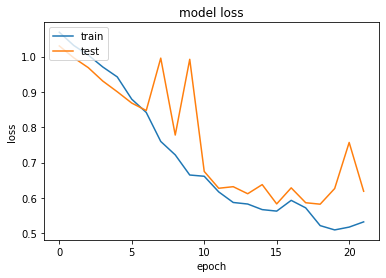

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

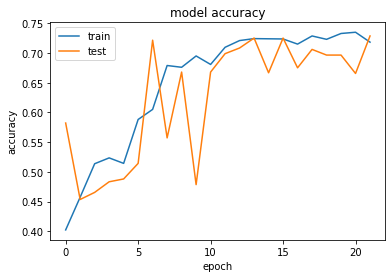

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
test_loss, test_acc = model2.evaluate([np.array(Xtestl),np.array(Xtestg)], np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=model2.predict([np.array(Xtestl),np.array(Xtestg)])
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

10/10 [==============================] - 0s 5ms/step - loss: 0.7379 - accuracy: 0.7033
Test accuracy: 0.70333331823349
[[96  4  0]
 [72 27  1]
 [12  0 88]]
